In [34]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
netflix_df = pd.read_csv("Resources/netflix.csv")
netflix_df = netflix_df.set_index('Title')
netflix_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Breaking Bad,2008,18+,9.5,96%
Stranger Things,2016,16+,8.8,93%
Money Heist,2017,18+,8.4,91%
Sherlock,2010,16+,9.1,78%
Better Call Saul,2015,18+,8.7,97%


In [36]:
imdb_average = netflix_df['IMDB'].mean()
imdb_average

7.163279955825518

In [37]:
netflix_df_dropped = netflix_df.dropna()
netflix_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Breaking Bad,2008,18+,9.5,96%
Stranger Things,2016,16+,8.8,93%
Money Heist,2017,18+,8.4,91%
Sherlock,2010,16+,9.1,78%
Better Call Saul,2015,18+,8.7,97%


In [38]:
netflix_df_dropped['RT'] = netflix_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
netflix_df_dropped.head()

<ipython-input-38-b3c0160c5f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_dropped['RT'] = netflix_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
Breaking Bad,2008,18+,9.5,96%,96
Stranger Things,2016,16+,8.8,93%,93
Money Heist,2017,18+,8.4,91%,91
Sherlock,2010,16+,9.1,78%,78
Better Call Saul,2015,18+,8.7,97%,97


In [41]:
rotten_average = netflix_df_dropped['RT'].mean()
age_group = netflix_df['Age'].mode()
total_shows = len(netflix_df)
title = netflix_df.index.to_list()

In [54]:
netflix_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = netflix_df.index[0]

In [62]:
netflix_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
netflix_df_dropped.head(100)
highest_rated_rt = netflix_df_dropped.index[0]
highest_rated_rt

<ipython-input-62-717219f67f22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


'Avatar: The Last Airbender'

In [63]:
netflix = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rotten_average})
netflix

,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,1931,16+,Breaking Bad,7.16328,Avatar: The Last Airbender,78.322115


In [64]:
netflix_df = netflix_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(netflix_df['Year'], bins, labels=groups)

0       2000-2009
1       2010-2020
2       1980-1989
3       2010-2020
4       2000-2009
          ...    
1926    2010-2020
1927    2010-2020
1928    2010-2020
1929    2010-2020
1930    2010-2020
Name: Year, Length: 1931, dtype: category
Categories (6, object): [1900-1949 < 1950-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010-2020]

In [65]:
netflix_df['Age Range'] = pd.cut(netflix_df['Year'], bins, labels=groups)
netflix_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Breaking Bad,2008,18+,9.5,96%,2000-2009
1,Our Planet,2019,7+,9.3,93%,2010-2020
2,Ramayan,1987,all,9.3,NaN,1980-1989
3,Yeh Meri Family,2018,NaN,9.2,NaN,2010-2020
4,Avatar: The Last Airbender,2005,7+,9.2,100%,2000-2009


In [66]:
age_range_df = netflix_df.groupby("Age Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Breaking Bad,2008,18+,9.5,96%,2000-2009
1,Our Planet,2019,7+,9.3,93%,2010-2020
2,Ramayan,1987,all,9.3,NaN,1980-1989
3,Yeh Meri Family,2018,NaN,9.2,NaN,2010-2020
4,Avatar: The Last Airbender,2005,7+,9.2,100%,2000-2009
...,...,...,...,...,...,...
1753,House Doctor,1998,NaN,4.8,NaN,1990-1999
1766,Black Crows,1983,NaN,4.4,NaN,1980-1989
1767,Ninja Turtles: The Next Mutation,1997,7+,4.4,NaN,1990-1999
1857,Born To Explore,1914,NaN,NaN,NaN,1900-1949


In [67]:
ranges = age_range_df["Age Range"].count()
ranges

Age Range
1900-1949       1
1950-1979      10
1980-1989      18
1990-1999      35
2000-2009     181
2010-2020    1686
Name: Age Range, dtype: int64

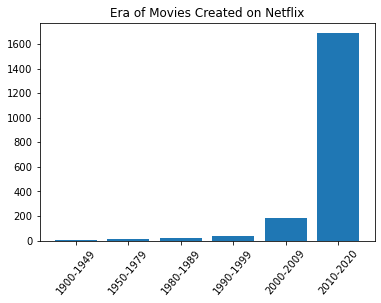

In [68]:
plt.bar(groups, ranges);
plt.title('Era of Movies Created on Netflix');
plt.xticks(rotation=50);